#     Plot correlation comparisons of aircraft and model data

## Setup imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import notebook_prepare as pre

## Define plotting function

Now that we've set up the imports, we can define the function producing the plots that we'll use later.

In [6]:
def plot_correlations(df,plotdir,key,outcome,label) :

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    alt_data = df['Altitude'][:]
    data = pre.read_data_values(df, True)

    # Plot the data.
    plt.scatter(data['a_avg'],data['m_avg'],s=50,c=alt_data)

    # Plot a 1:1 agreement line.
    min = np.nanmin([np.nanmin(data['a_avg']),np.nanmin(data['m_avg'])])
    max = np.nanmax([np.nanmax(data['a_avg']),np.nanmax(data['m_avg'])])
    plt.plot([min,max],[min,max],lw=5,ls='dashed',c='grey')

    # Set the axes labels.
    plt.xlabel('Aircraft '+label,fontsize=50,labelpad=10)
    plt.ylabel('Model '+label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='vertical',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=25)
    cb.set_label('Altitude / m',fontsize=30,labelpad=10)

    if outcome == 'show':
        plt.show()

    elif outcome == 'save':
        plt.savefig(plotdir+key+'_Correlation.png')
        plt.close()

## Specify the flight number

In [7]:
# Set the flight number.
# Current valid options are C110, M270, M296 and M302.
flight_number = 'C110'  

# Specify whether to save or just display the plots.
# Valid options are 'show' or 'save'.
outcome = 'show'

## Prepare the data and plot for each pollution species

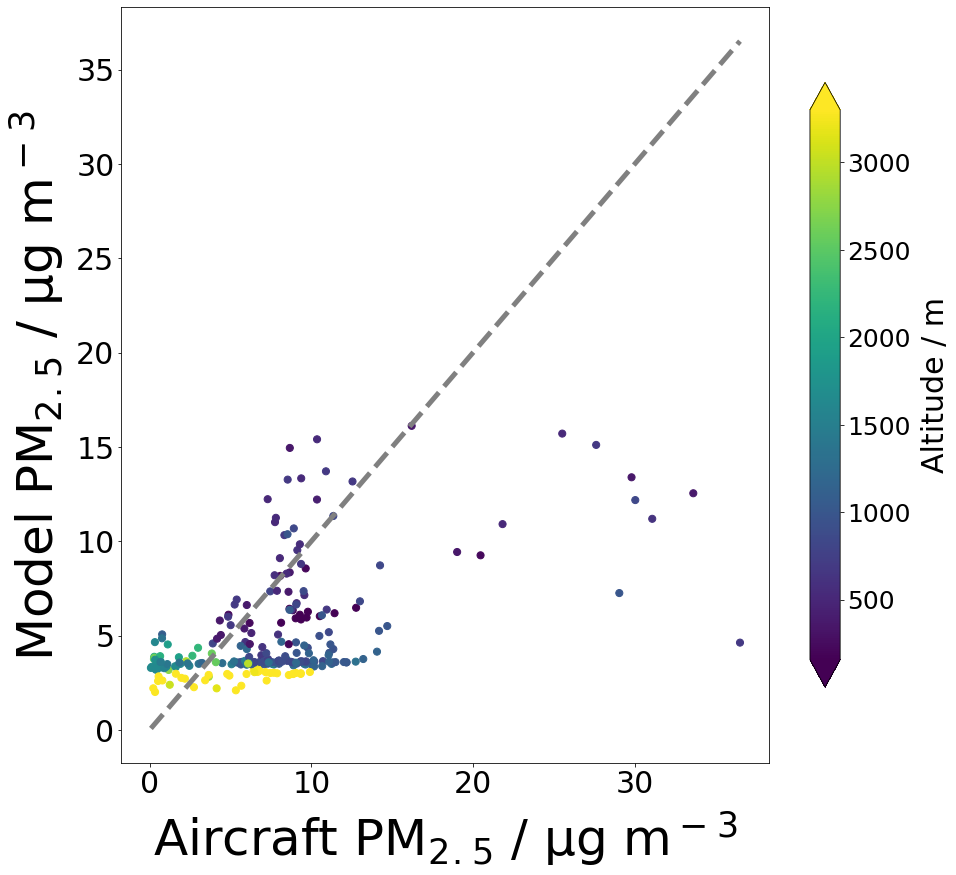

In [8]:
species_dict = pre.species_dictionary(flight_number)
setup = pre.setup_notebook(flight_number,True)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],True)
    
    plot_correlations(resample_df,setup[5],key,outcome,label)